# Week 1 Assignment 2: Design Three Layer ANN Classifier
Joseph Allibone

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [12]:
#loading my data
file_path = r'C:\Users\allib\OneDrive\Desktop\MS Data Science\ANA680\Week1\Ass2-2\Churn_Modelling.csv'
df = pd.read_csv(file_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
#select features and target
X = df.iloc[:, 3:-1]  # From CreditScore to EstimatedSalary
y = df.iloc[:, -1]    # 'Exited' column


I picked out which columns I want to use to train the model. The goal is to predict whether a customer will churn — that's what the Exited column tells us. So I treated that as our target variable, and we store it in y.  For the input features I used everything from column 3 up to, but not including, the last column. That range includes things like credit score, age, balance, number of products, etc. These are all things that might affect whether someone leaves the bank. I skip over the first few columns like RowNumber, CustomerId, and Surname because they’re just identifiers.

In [17]:
#encode categorical vars
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# One-hot encode Geography
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)


I turned the text columns into numbers so the neural network can understand them.

For the Gender column, I used label encoding to change the values to 0s and 1s, like turning "Female" into 0 and "Male" into 1.  For the Geography column, I used one-hot encoding. I created new columns like Geography_Germany and Geography_Spain. If a customer is from Germany, that column gets a 1; otherwise, it’s a 0.  I dropped one of the geography columns to avoid repeating the same info in a different form.

In [30]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


I split the data into two parts, one for training the model and one for testing it.
I used 80% of the data to train the neural network, so it could learn the patterns. Then I saved the other 20% to test how well the model works on new, the unseen data.

In [32]:
#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


I scaled the data so all the numbers are on the same level.  Some columns, like balance or salary, have big values, while others, like credit score or age, are much smaller.  If I don’t scale them, the model might think the big numbers are more important just because they’re bigger, even if they’re not.

So I used StandardScaler to fix that. It transforms all the values so they have a similar range (centered around 0 with similar spread), which helps the neural network learn more effectively.

I fit the scaler to the training data, then used it to transform both the training and testing sets.

In [36]:
# build my ANN

from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))



I started by telling the ANN how many input features I have with an Input() layer, this helps the model know what shape of data it’s getting. Then I added two hidden layers using the Dense() function with 6 neurons each and 'relu' as the activation function. ReLU helped the model learn non-linear patterns, which makes it better at complex predictions.

For the last layer, I added one neuron with a 'sigmoid' activation because I’m doing binary classification, I want the output to be a number between 0 and 1, representing the chance a customer will churn.

In [39]:
#compile my model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


I used 'adam' as the optimizer. The loss function I used is 'binary_crossentropy' because this is a yes-or-no (binary) prediction, either the customer leaves or doesn’t.  I also added 'accuracy' as a metric so I can see how well the model is doing during training.

In [42]:
#train my model
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6489 - loss: 0.6424
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4963
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7975 - loss: 0.4623
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4452
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.4397
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8030 - loss: 0.4212
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8089 - loss: 0.4138
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8151 - loss: 0.4028
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8345 - loss: 0.3882
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8407 - loss: 0.3819
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8415 - loss: 0.3690
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

I gave it the inputs (X_train) and the correct answers (y_train).  I set the batch size to 32, to look at 32 rows at a time before updating itself.  I trained it for 50 epochs, it went through the entire training set 50 times to learn patterns.  I used verbose=1 to show progress while it’s training.

In [45]:
#predict & evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluation
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy: {acc:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[1556   51]
 [ 227  166]]

Accuracy: 0.8610


I tested the model on new data to see how well it learned.  First, I used the model to make predictions on the test set. Since this is binary classification, I turned the output into 0s and 1s by checking if each prediction was greater than 0.5.  Then I printed the confusion matrix to see the breakdown of the results.  

1556 customers were correctly predicted to stay (true negatives)

166 customers were correctly predicted to leave (true positives)

51 customers were wrongly predicted to leave, but they stayed (false positives)

227 customers were wrongly predicted to stay, but they left (false negatives)

I calculated the accuracy, which came out to 0.8610. That means the model correctly predicted whether a customer would churn or not about 86% of the time.

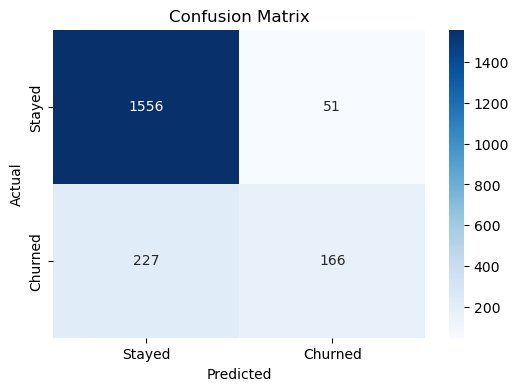

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# make heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


After training and evaluating the neural network model, my overall accuracy reached 86.1%, It performed well at identifying customers who stayed, with 1,556 true negatives and only 51 false positives. However, it struggled more with correctly identifying customers who actually churned, showing 166 out of 393 of them, which gives a recall of about 42.2%.

While the precision for predicting churn was around 76.5%, this shows that most predicted churns were correct, the model missed a large portion of actual churners. This is reflected in the F1 score of 0.545, which shows a tradeoff between precision and recall.